# Домашнее задание к лекции "Статистика. Практика"

## Задание 1

Вернемся к [набору данных о видеоиграх](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/vgsales.csv).

Ответьте на следующие вопросы:

1) Как критики относятся к спортивным играм?  
2) Критикам нравятся больше игры на PC или на PS4?  
3) Критикам больше нравятся стрелялки или стратегии?  

Для каждого вопроса:
- сформулируйте нулевую и альтернативную гипотезы;
- выберите пороговый уровень статистической значимости;
- опишите полученные результаты статистического теста.

In [2]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import scipy 

In [3]:
scipy.version.version  # какая версия библиотеки используется

'1.5.0'

In [4]:
df_games = pd.read_csv('vgsales.csv', error_bad_lines=False)  # Откроем датасет
display(df_games.head())
display(df_games.info())


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


None

Очистка и препроцессинг:


In [5]:
df_games['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [6]:
df_games['Critic_Score'] = df_games['Critic_Score'].replace('tbd', np.NaN)
df_games['User_Score'] = df_games['Critic_Score'].replace('tbd', np.NaN)
df_games['Critic_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [7]:
df_games['User_Score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Уточнение типов данных:

In [8]:
# исправим типы данных
df_games['Year_of_Release'] = df_games['Year_of_Release'].astype('Int64')
df_games['User_Count'] = df_games['User_Count'].astype('Int64')
df_games['User_Score'] = df_games['User_Score'].astype('float64')
df_games['Critic_Count'] = df_games['Critic_Count'].astype('float64')



Удалим из датасета строки с незаполненными оценками критиков:

In [9]:
# Удалим строки с незаполнеными значениями оценок критиков:
pct_all = len(df_games['Critic_Score'])
pct_count = np.mean(df_games['Critic_Score'].notna())
pct_missing = np.mean(df_games['Critic_Score'].isnull())
print('Количество всего значений:', pct_all)
print(f'Процент ненулевых значений: {pct_count*100:.2f}')
print(f'Процент нулевых значений:{pct_missing*100:.2f}')

df_games = df_games.dropna(subset=['Critic_Score'])
print ('После обработки:')
pct_all = len(df_games['Critic_Score'])
pct_count = np.mean(df_games['Critic_Score'].notna())
pct_missing = np.mean(df_games['Critic_Score'].isnull())
print('Количество всего значений:', pct_all)
print(f'Процент ненулевых значений: {pct_count*100:.2f}')
print(f'Процент нулевых значений:{pct_missing*100:.2f}')


Количество всего значений: 16719
Процент ненулевых значений: 48.67
Процент нулевых значений:51.33
После обработки:
Количество всего значений: 8137
Процент ненулевых значений: 100.00
Процент нулевых значений:0.00


**1) Как критики относятся к спортивным играм?**

Дополним вопрос поставленный на резрешение: Как критики относятся к спортивным играм ***по сравнению со всеми другими видами игр?***

In [10]:
# Выделим датасет спортивных игр:
df_sports = df_games[df_games['Genre'] == 'Sports']
# И всех остальных игр:
df_others = df_games[df_games['Genre'] != 'Sports']

In [11]:
df_sports.info()
df_others.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194 entries, 0 to 16555
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             1194 non-null   object 
 1   Platform         1194 non-null   object 
 2   Year_of_Release  1165 non-null   Int64  
 3   Genre            1194 non-null   object 
 4   Publisher        1194 non-null   object 
 5   NA_Sales         1194 non-null   float64
 6   EU_Sales         1194 non-null   float64
 7   JP_Sales         1194 non-null   float64
 8   Other_Sales      1194 non-null   float64
 9   Global_Sales     1194 non-null   float64
 10  Critic_Score     1194 non-null   float64
 11  Critic_Count     1194 non-null   float64
 12  User_Score       1194 non-null   float64
 13  User_Count       973 non-null    Int64  
 14  Developer        1191 non-null   object 
 15  Rating           1181 non-null   object 
dtypes: Int64(2), float64(8), object(6)
memory usage: 160.9+ KB


Среднее значение оценки критиков по классу спортивных игр: 72.0
Среднее значение оценки критиков по всем остальным классам игр: 68.5


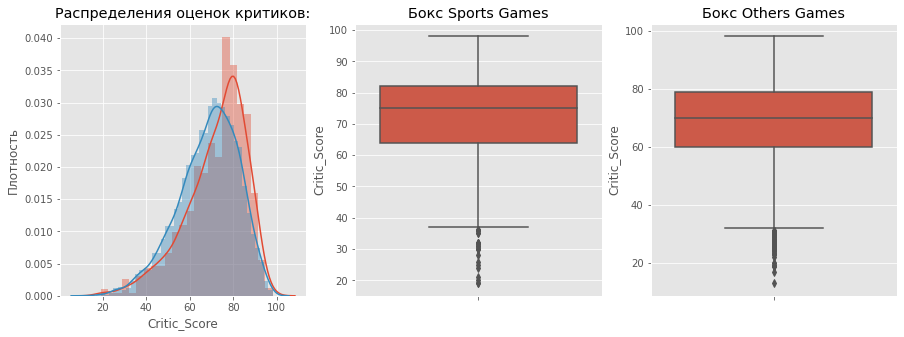

In [12]:
print(f'Среднее значение оценки критиков по классу спортивных игр: {df_sports["Critic_Score"].mean():.1f}')
print(f'Среднее значение оценки критиков по всем остальным классам игр: {df_others["Critic_Score"].mean():.1f}')

plt.figure(figsize=(15, 5))
plt.subplot(1,3,1).set(title='Распределения оценок критиков:')
plt.ylabel('Плотность')
sns.distplot(df_sports['Critic_Score'])
sns.distplot(df_others['Critic_Score'])

plt.subplot(1,3,2).set(title='Бокс Sports Games')
sns.boxplot(y=df_sports['Critic_Score'])
plt.subplot(1,3,3).set(title='Бокс Others Games')
sns.boxplot(y=df_others['Critic_Score'])
plt.show()

In [13]:
significance = 0.05
print('Проверка нормальности распределения. Тест Колмогорова-Смирнова:')

print("Для спортивных игр, KS-statistic: %f, p-value: %f" % stats.kstest(df_sports["Critic_Score"], 'norm'))
print("Для платформы PS4, KS-statistic:: %f, p-value: %f" % stats.kstest(df_others["Critic_Score"], 'norm'))

Проверка нормальности распределения. Тест Колмогорова-Смирнова:
Для спортивных игр, KS-statistic: 1.000000, p-value: 0.000000
Для платформы PS4, KS-statistic:: 1.000000, p-value: 0.000000


Распределение обеих выборок не подчиняется нормальному закону, однако для выборок большого размера (более 30 значений) согласно центральной предельной теореме среднее значение выборки и стандартного отклонения будет равняться среднему значению генеральной совокупности и стандартному отклонению. На практике это означает лопустимость применения критерия Стьюдента для оценки среднего и для распределений не подчиняющихся нормальному закону.

Определим насколько статистически значима разница между средними  при помощи одностороннего  теста **Стьюдента**:
1. **H0:**  *среднее значение оценок критиков для спортивных игр меньше или равно среднему значению обобщенных оценок критиков для всех остальных жанров.*
2. **H1:**  *среднее значение оценок критиков для спортивных игр больше среднего значения  обобщенных оценок критиков для всех остальных жанров.*
среднее значение оценок критиков для спортивных игр больше среднего значения  обобщенных оценок критиков для всех остальных жанров

In [14]:
significance = 0.05*2 # увеличим уровень значимости, поскольку используем односторонний критерий

tvalueSt, pvalueSt = stats.ttest_ind(df_sports["Critic_Score"], df_others["Critic_Score"], alternative = 'greater')
print ('\nПо двухвыборочному одностороннему t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')

if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем альтернативную гипотезу.')
    print('Среднее значение оценок критиков для спортивных игр больше ', end='')
    print('среднего значения  обобщенных оценок критиков для всех остальных жанров.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу:')
    print('Среднее значение оценок критиков для спортивных игр меньше или равно ', end='')
    print('среднему значению обобщенных оценок критиков для всех остальных жанров.')
print('')

TypeError: ttest_ind() got an unexpected keyword argument 'alternative'

**Вывод:** Критики в среднем  благосклонее к спортивным играм чем  к в общей массе остальным другим жанрам. И это статистически значимая разница.

**2) Критикам нравятся больше игры на PC или на PS4?**

In [ ]:
# Выделим датасеты игр на PC или PS4:
print(df_games.Platform.unique())
df_PC = df_games[df_games['Platform'] == 'PC']
df_PS4= df_games[df_games['Platform'] == 'PS4']


Выборка по играм  на платформе PC:

In [ ]:
display(df_PC['Critic_Score'].describe())


Выборка по играм  на платформе PS4:

In [ ]:
display(df_PS4['Critic_Score'].describe())

Визуализируем распределения: 

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1).set(title='Распределения оценок критиков:')
plt.ylabel('Плотность')
sns.distplot(df_PC['Critic_Score'])
sns.distplot(df_PS4['Critic_Score'])

plt.subplot(1,3,2).set(title='Бокс PC')
sns.boxplot(y=df_PC['Critic_Score'])
plt.subplot(1,3,3).set(title='Бокс PS4')
sns.boxplot(y=df_PS4['Critic_Score'])
plt.show()

In [ ]:
print(f'Средняя оценка критиков на платформе PC: {df_PC["Critic_Score"].mean():.1f}')
print(f'Средняя оценка критиков на платформе PS4: {df_PS4["Critic_Score"].mean():.1f}')

Определим насколько статистически значима разница между средними  при помощи одностороннего  теста **Стьюдента**:
1. **H0:**  *среднее значение оценок критиков для платформы PC меньше или равно среднему значению оценок критиков для платформы PS4..*
2. **H1:**  *среднее значение оценок критиков для платформы PC больше среднего значения оценок критиков для платформы PS4.*


In [ ]:
significance = 0.05*2 # увеличим уровень значимости, поскольку используем односторонний критерий
# greater: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

tvalueSt, pvalueSt = stats.ttest_ind(df_PC["Critic_Score"], df_PS4["Critic_Score"], alternative = 'greater')
print ('\nПо двухвыборочному одностороннему t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')

if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем альтернативную гипотезу.')
    print('Cреднее значение оценок критиков для платформы PC больше', end='')
    print(' среднего значения оценок критиков для платформы PS4.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу:')
    print('Cреднее значение оценок критиков для платформы PC меньше или равно среднему значению оценок критиков для платформы PS4.')
print('')



plt.figure(figsize=(15, 5))
plt.subplot(1,2,1).set(title='Распределения оценок')
plt.ylabel('Плотность')
sns.distplot(df_PC["Critic_Score"])
sns.distplot(df_PS4["Critic_Score"])

plt.subplot(1,2,2).set(title='Бокс-плоты')
plt.boxplot([df_PC["Critic_Score"], df_PS4["Critic_Score"]], labels=['PC','PS4'])
plt.show()

**Вывод:** Критикам в среднем больше нравятся игры для платформы персональных компьютеров, чем для игровых приставок Sony Play Station 4. И это статистически значимая разница.

**3) Критикам больше нравятся стрелялки или стратегии?**

In [ ]:
# Выделим датасеты игр по жпнрам шутеры и стратегии:
print(df_games.Genre.unique())
df_shooters = df_games[df_games['Genre'] == 'Shooter']
df_strategys = df_games[df_games['Genre'] == 'Strategy']


Выборка оценок критиков по шутерам:

In [ ]:
display(df_shooters['Critic_Score'].describe())


Выборка оценок критиков по стратегиям:

In [ ]:
display(df_strategys['Critic_Score'].describe())

Визуализируем распределения оценок критиков: 

In [ ]:
plt.figure(figsize=(15, 5))
plt.subplot(1,3,1).set(title='Распределения оценок критиков:')
plt.ylabel('Плотность')
sns.distplot(df_shooters['Critic_Score'])
sns.distplot(df_strategys['Critic_Score'])

plt.subplot(1,3,2).set(title='Бокс Shooters')
sns.boxplot(y=df_shooters['Critic_Score'])
plt.subplot(1,3,3).set(title='Бокс Strategys')
sns.boxplot(y=df_strategys['Critic_Score'])
plt.show()

In [ ]:
print(f'Средняя оценка критиков на платформе PC: {df_shooters["Critic_Score"].mean():.1f}')
print(f'Средняя оценка критиков на платформе PC: {df_strategys["Critic_Score"].mean():.1f}')

Определим насколько статистически значима разница между средними  при помощи одностороннего  теста **Стьюдента**:
1. **H0:**  *среднее значение оценок критиков для игр-шутеров больше или равно среднему значению оценок критиков для игр-стратегий.*
2. **H1:**  *среднее значение оценок критиков для игр-шутеров меньше среднего значения оценок критиков для игр-стратегий.*


‘less’: the mean of the distribution underlying the first sample is less than the mean of the distribution underlying the second sample.

In [ ]:
significance = 0.05*2 # увеличим уровень значимости, поскольку используем односторонний критерий
# greater: the mean of the distribution underlying the first sample is greater than the mean of the distribution underlying the second sample.

tvalueSt, pvalueSt = stats.ttest_ind(df_shooters["Critic_Score"], df_strategys["Critic_Score"], alternative = 'less')
print ('\nПо двухвыборочному одностороннему t-тесту Стьюдента:')
print(f't_value: {tvalueSt:.3f}, _pvalue: {pvalueSt:.3f} заданный уровень значимости: {significance:.3f}')

if pvalueSt <= significance:
    print(f'На {significance:.2f} уровене значимости, мы отвергаем нулевую гипотезе и принимаем альтернативную гипотезу.')
    print('Cреднее значение оценок критиков для игр-шутеров меньше среднего значения оценок критиков для игр-стратегий.')
else:
    print(f'На {significance:.2f} уровене значимости, мы не можем отвергнуть нулевую гипотезу:')
    print('Среднее значение оценок критиков для игр-шутеров больше или равно среднему значению оценок критиков для игр-стратегий.')
print('')


**Вывод:** Критикам в среднем больше нравятся игры-стратегии, чем игры-шутеры. И это статистически значимая разница.

## Задание 2

Реализуйте базовую модель логистической регрессии для классификации текстовых сообщений (используемые данные [здесь](https://github.com/obulygin/pyda_homeworks/blob/master/stat_case_study/spam.csv)) по признаку спама. Для этого:

1) Приведите весь текст к нижнему регистру;  
2) Удалите мусорные символы;  
3) Удалите стоп-слова;  
4) Приведите все слова к нормальной форме;  
5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:  

```
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)
```

Можете поэкспериментировать с параметрами [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html);  
6) Разделите данные на тестовые и тренировочные в соотношении 30/70, укажите `random_state=42`. Используйте [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html);  
7) Постройте модель [логистической регрессии](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html), укажите `random_state=42`, оцените ее точность на тестовых данных;  
8) Опишите результаты при помощи [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html?highlight=confusion_matrix#sklearn.metrics.confusion_matrix);  
9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного).

In [16]:
 # Подгрузим пакеты 
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats 
matplotlib.style.use('ggplot')
%matplotlib inline
import seaborn as sns
import scipy 
import re

In [120]:
df = pd.read_csv('spam.csv', error_bad_lines=False)  # Откроем датасет
df_original = df.copy() # сделаем копию
# снять ограничение на отображение столбца
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows',80)
display(df.head())
display(df.info())
display(df_original.info())

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives around here though"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


None

**1) Приведите весь текст к нижнему регистру.**

In [18]:
df['Message'] = df['Message'].str.lower()

In [19]:
pd.set_option('display.max_colwidth', None)

display(df.head())

,Category,Message
0,ham,"go until jurong point, crazy.. available only in bugis n great world la e buffet... cine there got amore wat..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005. text fa to 87121 to receive entry question(std txt rate)t&c's apply 08452810075over18's
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives around here though"


**2) Удалите мусорные символы.**

In [20]:
# определимся с типами данных
df = df.astype({
'Category': 'category',
'Message' : 'string'
})

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Category  5572 non-null   category
 1   Message   5572 non-null   string  
dtypes: category(1), string(1)
memory usage: 49.2 KB


In [21]:
# оставляем только слова:
df.loc[:, 'Message'] = df['Message'].apply(lambda x: re.sub('[\W_]+', ' ', x))                   
# обрезаем  пробелы:
df.loc[:, 'Message'] = df['Message'].apply(lambda x: re.sub('^\s+|\s+$', '', x))
 

In [22]:
df.head()

,Category,Message
0,ham,go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup final tkts 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
3,ham,u dun say so early hor u c already then say
4,ham,nah i don t think he goes to usf he lives around here though


**3) Удалите стоп-слова**

In [23]:
import nltk
from nltk.corpus import stopwords

In [24]:
# Загрузим список стоп-слов для английского языка:
stop_words = set(stopwords.words('english')) 
  
# Функция очистки по стоп-словам: 
def clean_str(message_input):
    message_output =''
    message_list = []
    words = message_input.split() 
    for r in words: 
        if not r in stop_words: 
            message_list.append(r) 
            message_list.append(" ")
    return message_output.join (message_list)

df['Message'] = df['Message'].apply(clean_str)
df.head()


,Category,Message
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


**4) Приведите все слова к нормальной форме**

Произведем лемматизацию

Лемматизация — процесс приведения словоформы к лемме — её нормальной (словарной) форме. В русском языке:

    для существительных — именительный падеж, единственное число;
    для прилагательных — именительный падеж, единственное число, мужской род;
    для глаголов, причастий, деепричастий — глагол в инфинитиве несовершенного вида.

В других языках – по аналогии.


In [25]:
from nltk.stem import WordNetLemmatizer
#nltk.download('omw-1.4')
#nltk.download('wordnet')

wordnet_lemmatizer = WordNetLemmatizer()

# Функция лемматизации: 
def lem_str(message_input):
    message_output =''
    message_list = []
    words = message_input.split() 
    for word in words: 
            wordnet_lemmatizer.lemmatize(word)
            message_list.append(word) 
            message_list.append(" ")
    return message_output.join(message_list)

df['Message'] = df['Message'].apply(lem_str)
df.head()



,Category,Message
0,ham,go jurong point crazy available bugis n great world la e buffet cine got amore wat
1,ham,ok lar joking wif u oni
2,spam,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c apply 08452810075over18
3,ham,u dun say early hor u c already say
4,ham,nah think goes usf lives around though


**5) Преобразуйте все сообщения в вектора TF-IDF. Вам поможет следующий код:**

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df.Message)
names = tfidf.get_feature_names()
tfidf_matrix = pd.DataFrame(tfidf_matrix.toarray(), columns=names)

In [28]:
tfidf_matrix.info()
display(tfidf_matrix.head())
print(tfidf_matrix.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Columns: 8571 entries, 00 to 〨ud
dtypes: float64(8571)
memory usage: 364.4 MB


,00,000,000pes,008704050406,0089,0121,01223585236,01223585334,0125698789,02,...,zhong,zindgi,zoe,zogtorius,zoom,zouk,zyada,èn,ú1,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(5572, 8571)


In [30]:
# проверим имеющиеся в датафрейсе категории:
df['Category'].unique()

[ham, spam]
Categories (2, object): [ham, spam]

**6) Разделите данные на тестовые и тренировочные в соотношении** 30/70, **укажите** random_state=42. **Используйте train_test_split**

In [31]:
# Грузим библиотеки 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Создаем массивы:

1) **X** - многомерный массив (вектора TF-IDF) исходных параметров для прогноза.

2) **y** - выходной прогнозный параметр -  столбец категории .

In [32]:
X = tfidf_matrix
y = df['Category']

In [33]:
# Разделим данные 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Проверка разбиения
print('Количество строк тренировочного массива X_train:',len(X_train))
print('Количество строк тестового массива X_test:',len(X_test))
print('Количество строк тренировочного массива прогнозного параметра y_train:', len(y_train))
print('Количество строк тестового массива прогнозного параметра y_test:', len(y_test))


Количество строк тренировочного массива X_train: 3900
Количество строк тестового массива X_test: 1672
Количество строк тренировочного массива прогнозного параметра y_train: 3900
Количество строк тестового массива прогнозного параметра y_test: 1672


**7) Постройте модель логистической регрессии, укажите** random_state=42, **оцените ее точность на тестовых данных**

"Логистическая регрессия на Python" https://habr.com/ru/company/skillfactory/blog/701530/

In [37]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

Пробуем выполнить предсказание для известной части данных из **X_test**:

In [38]:
y_pred = logreg.predict(X_test)
y_pred
len(y_pred)

1672

Сравним значения предсказанные моделью с реальными значениями:

In [45]:
i = 0
for y_test_val in y_test:
    print(f'{i+1:2d}. Реальное значение категории сообщения::{y_test_val} \
смоделированное значение категории сообщения::{y_pred[i]}')
    i +=1

 1. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 2. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 3. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 4. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 5. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 6. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 7. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 8. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
 9. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
10. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
11. Реальное значение категори

1638. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1639. Реальное значение категории сообщения::spam смоделированное значение категории сообщения::spam
1640. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1641. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1642. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1643. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1644. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1645. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1646. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1647. Реальное значение категории сообщения::ham смоделированное значение категории сообщения::ham
1648. Ре

In [ ]:
Выведем только ошибки: 

In [123]:
i = 0
err = 0 # счётчик ошибок
err_index = [] # список индексов строк с ошибочной классификацией
err_list = [] # список значений ошибочных категорий
for index_, y_test_val in y_test.items():
    if y_test_val != y_pred[i]:
        print(f'{i+1:2d}. Реальное значение категории сообщения:{y_test_val} индекс строки:{index_} \
смоделированное значение категории сообщения:{y_pred[i]}')
        err += 1 # увеличим счётчик ошибок
        err_index.append(index_) # запомним индекс строки в датафрейме в список
        err_list.append(y_pred[i])
    i += 1
print('\nОбщее количество ошибок:', err, 'из', i, 'значений.') 
print(f'\nПроцент ошибок:{(err / i) * 100:.2f}') 

18. Реальное значение категории сообщения:ham индекс строки:2952 смоделированное значение категории сообщения:spam
41. Реальное значение категории сообщения:spam индекс строки:881 смоделированное значение категории сообщения:ham
48. Реальное значение категории сообщения:spam индекс строки:1961 смоделированное значение категории сообщения:ham
75. Реальное значение категории сообщения:spam индекс строки:3864 смоделированное значение категории сообщения:ham
85. Реальное значение категории сообщения:spam индекс строки:2575 смоделированное значение категории сообщения:ham
120. Реальное значение категории сообщения:spam индекс строки:3548 смоделированное значение категории сообщения:ham
161. Реальное значение категории сообщения:spam индекс строки:2402 смоделированное значение категории сообщения:ham
167. Реальное значение категории сообщения:spam индекс строки:4527 смоделированное значение категории сообщения:ham
168. Реальное значение категории сообщения:spam индекс строки:15 смоделированн

In [ ]:
# Или встроенным инструментом тоже самое
print(f'Точность в процентах классификатора логистической \
регрессии на тестовом наборе: {(logreg.score(X_test, y_test)*100):.2f}')
print(f'Процент ошибок логистической регрессии \
на тестовом наборе: {((1-logreg.score(X_test, y_test))*100):.2f}')

**8) Опишите результаты при помощи confusion_matrix (матрицы ошибок)**

In [117]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
print('Матрица ошибок:' )
print(cnf_matrix)

Матрица ошибок:
[[1445    3]
 [  69  155]]


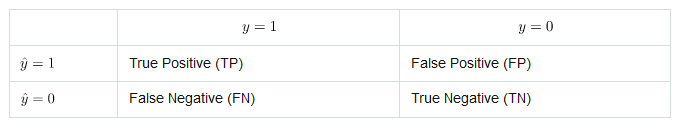

https://habr.com/ru/company/ods/blog/328372/

Здесь $\hat y$ — это ответ алгоритма на объекте, а $y$ — истинная метка класса на этом объекте.
Таким образом, ошибки классификации бывают двух видов: False Negative (FN) и False Positive (FP).

**Вывод:** Потрясающе !!! Это работает:
1. 1445 истиноположительных оценок, 
2. 155 истиноотрицательных оценок,
3. 3 ложноположительные оценки,
4. 69 ложноотрицательных оценок,
из общего количества в 1672 оценки. 
Что и даёт общую точность в 96 процентов.

Матрица ошибок без нормализации
[[1445    3]
 [  69  155]]


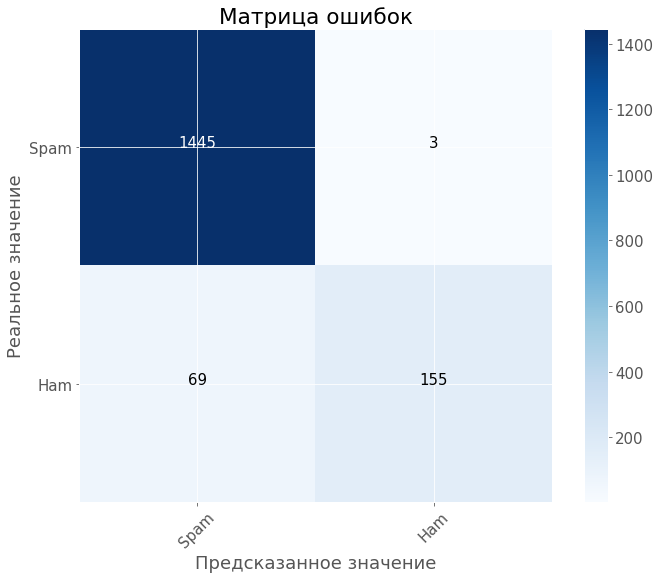

In [125]:
# Воспользуемся функцией построения матрицы ошибок из документации sklearn
# русификация Яндекс
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Матрица ошибок',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Нормализованная матрица ошибок")
    else:
        print('Матрица ошибок без нормализации')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Реальное значение')
    plt.xlabel('Предсказанное значение')

font = {'size' : 15}

plt.rc('font', **font)


plt.figure(figsize=(10, 8))
plot_confusion_matrix(cnf_matrix, classes=['Spam', 'Ham'],
                      title='Матрица ошибок')
plt.savefig("conf_matrix.png")
plt.show()

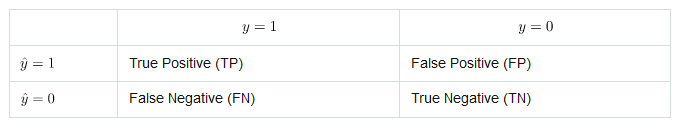

**9) Постройте датафрейм, который будет содержать все исходные тексты сообщений, классифицированные неправильно (с указанием фактического и предсказанного)**

In [121]:
# Датафрейм с ошибками
df_err = df_original.iloc[err_index]
df_err.insert(1, 'Predicted_Category', err_list, True)
display(df_err)

,Category,Predicted_Category,Message
2952,ham,spam,Hey now am free you can call me.
881,spam,ham,Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.
1961,spam,ham,Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394973 from Landline DATEBox1282EssexCM61XN 150p/min 18
3864,spam,ham,"Oh my god! I've found your number again! I'm so glad, text me back xafter this msgs cst std ntwk chg £1.50"
2575,spam,ham,Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.
3548,spam,ham,"Rock yr chik. Get 100's of filthy films &XXX pics on yr phone now. rply FILTH to 69669. Saristar Ltd, E14 9YT 08701752560. 450p per 5 days. Stop2 cancel"
2402,spam,ham,Babe: U want me dont u baby! Im nasty and have a thing 4 filthyguys. Fancy a rude time with a sexy bitch. How about we go slo n hard! Txt XXX SLO(4msgs)
4527,spam,ham,"I want some cock! My hubby's away, I need a real man 2 satisfy me. Txt WIFE to 89938 for no strings action. (Txt STOP 2 end, txt rec £1.50ea. OTBox 731 LA1 7WS. )"
15,spam,ham,"XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL"
2663,spam,ham,"Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?"
